In [56]:
#importing required libraries

import pandas as pd
# importing pandas library for importing and numerical operations

import numpy as np
# numpy library for data manipulation and analysis

import matplotlib.pyplot as plt
# importing matplotlib.pyplot library for creating data visualizations such as plots and charts.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb

In [57]:
data = pd.read_csv(r'C:\Users\Student\Documents\3_Fall 2023\Machine Learning\HW4\brca_fpkm_gdc_bari_nonormalization.csv')
# Loading the brca_fpkm_gdc_bari_nonormalization csv data to the data variable using pandas.

In [58]:
data

,Barcode,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,GUCA1ANB,HERC3.1,SMIM42,DUS4L-BCAP29,C8orf44-SGK3,NPBWR1,PDCD6-AHRR,ACTL10,PANO1,label
0,TCGA-3C-AAAU-01A,2.5997,0.0245,28.0941,2.5028,1.0286,1.3283,2.0679,7.2405,3.3357,...,0.0000,0,0.0,1.5228,0.0000,0.7273,0.0000,0,0.3882,LumA
1,TCGA-3C-AALI-01A,2.5597,0.0376,41.8377,9.8346,2.2798,3.1867,6.1088,14.3510,5.2247,...,0.0122,0,0.0,1.0051,0.0000,0.0198,0.0000,0,0.7440,Her2
2,TCGA-3C-AALJ-01A,13.1981,1.6187,48.7619,2.5366,1.8393,5.0401,5.5963,12.4875,3.6519,...,0.0000,0,0.0,0.7459,0.0155,0.0000,0.0000,0,0.7384,LumB
3,TCGA-3C-AALK-01A,12.8083,0.0530,22.4704,3.7386,1.5078,2.2218,6.5522,10.6094,3.2970,...,0.0000,0,0.0,0.8266,0.0000,0.0000,0.0033,0,0.6290,LumA
4,TCGA-4H-AAAK-01A,12.1947,0.2186,25.6404,3.1496,1.3185,2.2639,8.5326,12.5900,3.6635,...,0.0000,0,0.0,0.5208,0.0000,0.0000,0.0000,0,0.4609,LumA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,TCGA-WT-AB44-01A,5.4684,0.5633,17.7092,3.8705,0.7080,4.4252,2.9825,19.5928,3.0310,...,0.0000,0,0.0,0.5148,0.0000,0.0165,0.0000,0,0.7630,LumA
1001,TCGA-XX-A899-01A,9.2601,0.2740,26.6070,4.2926,1.3448,7.7138,11.3306,12.5267,4.7074,...,0.0000,0,0.0,0.8681,0.0136,0.1778,0.0000,0,0.4334,LumA
1002,TCGA-XX-A89A-01A,8.7338,15.3096,22.2972,3.1576,1.5348,5.5952,12.2559,14.5091,4.4737,...,0.0000,0,0.0,1.9245,0.0000,0.0158,0.0000,0,0.3952,LumA
1003,TCGA-Z7-A8R5-01A,16.0095,0.2117,27.1060,3.2761,0.5946,8.2715,6.9826,17.5916,2.4485,...,0.0000,0,0.0,0.5939,0.0000,0.0000,0.0000,0,0.5071,LumA


In [59]:
# Preprocess your data
X = data.drop(['label', 'Barcode'], axis=1)  # Assuming 'label' is the target column
y = data['label']

In [60]:
X

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,H3C3,GUCA1ANB,HERC3.1,SMIM42,DUS4L-BCAP29,C8orf44-SGK3,NPBWR1,PDCD6-AHRR,ACTL10,PANO1
0,2.5997,0.0245,28.0941,2.5028,1.0286,1.3283,2.0679,7.2405,3.3357,16.4362,...,0.1491,0.0000,0,0.0,1.5228,0.0000,0.7273,0.0000,0,0.3882
1,2.5597,0.0376,41.8377,9.8346,2.2798,3.1867,6.1088,14.3510,5.2247,9.1253,...,1.4860,0.0122,0,0.0,1.0051,0.0000,0.0198,0.0000,0,0.7440
2,13.1981,1.6187,48.7619,2.5366,1.8393,5.0401,5.5963,12.4875,3.6519,8.8129,...,0.0000,0.0000,0,0.0,0.7459,0.0155,0.0000,0.0000,0,0.7384
3,12.8083,0.0530,22.4704,3.7386,1.5078,2.2218,6.5522,10.6094,3.2970,13.0935,...,0.0000,0.0000,0,0.0,0.8266,0.0000,0.0000,0.0033,0,0.6290
4,12.1947,0.2186,25.6404,3.1496,1.3185,2.2639,8.5326,12.5900,3.6635,9.2099,...,0.0885,0.0000,0,0.0,0.5208,0.0000,0.0000,0.0000,0,0.4609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,5.4684,0.5633,17.7092,3.8705,0.7080,4.4252,2.9825,19.5928,3.0310,8.0995,...,0.0000,0.0000,0,0.0,0.5148,0.0000,0.0165,0.0000,0,0.7630
1001,9.2601,0.2740,26.6070,4.2926,1.3448,7.7138,11.3306,12.5267,4.7074,6.8561,...,0.0832,0.0000,0,0.0,0.8681,0.0136,0.1778,0.0000,0,0.4334
1002,8.7338,15.3096,22.2972,3.1576,1.5348,5.5952,12.2559,14.5091,4.4737,9.8494,...,0.0455,0.0000,0,0.0,1.9245,0.0000,0.0158,0.0000,0,0.3952
1003,16.0095,0.2117,27.1060,3.2761,0.5946,8.2715,6.9826,17.5916,2.4485,7.8471,...,0.0000,0.0000,0,0.0,0.5939,0.0000,0.0000,0.0000,0,0.5071


In [61]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [62]:
# Use LabelEncoder to convert string labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [63]:
# Standardize features
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

In [64]:
# Initialize classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000),
    'MLP': MLPClassifier(hidden_layer_sizes=(250, 150, 50), max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(C=1.0, gamma='scale', kernel='rbf'),
    'XGBoost': xgb.XGBClassifier() 
}

In [65]:
# Normalization methods
normalization_methods = ['Not Normalized', 'Z-score', 'Min-Max']

In [66]:
# Dictionary to store accuracies
accuracies_dict = {model_name: [] for model_name in classifiers}

In [67]:
from sklearn.impute import SimpleImputer
import warnings

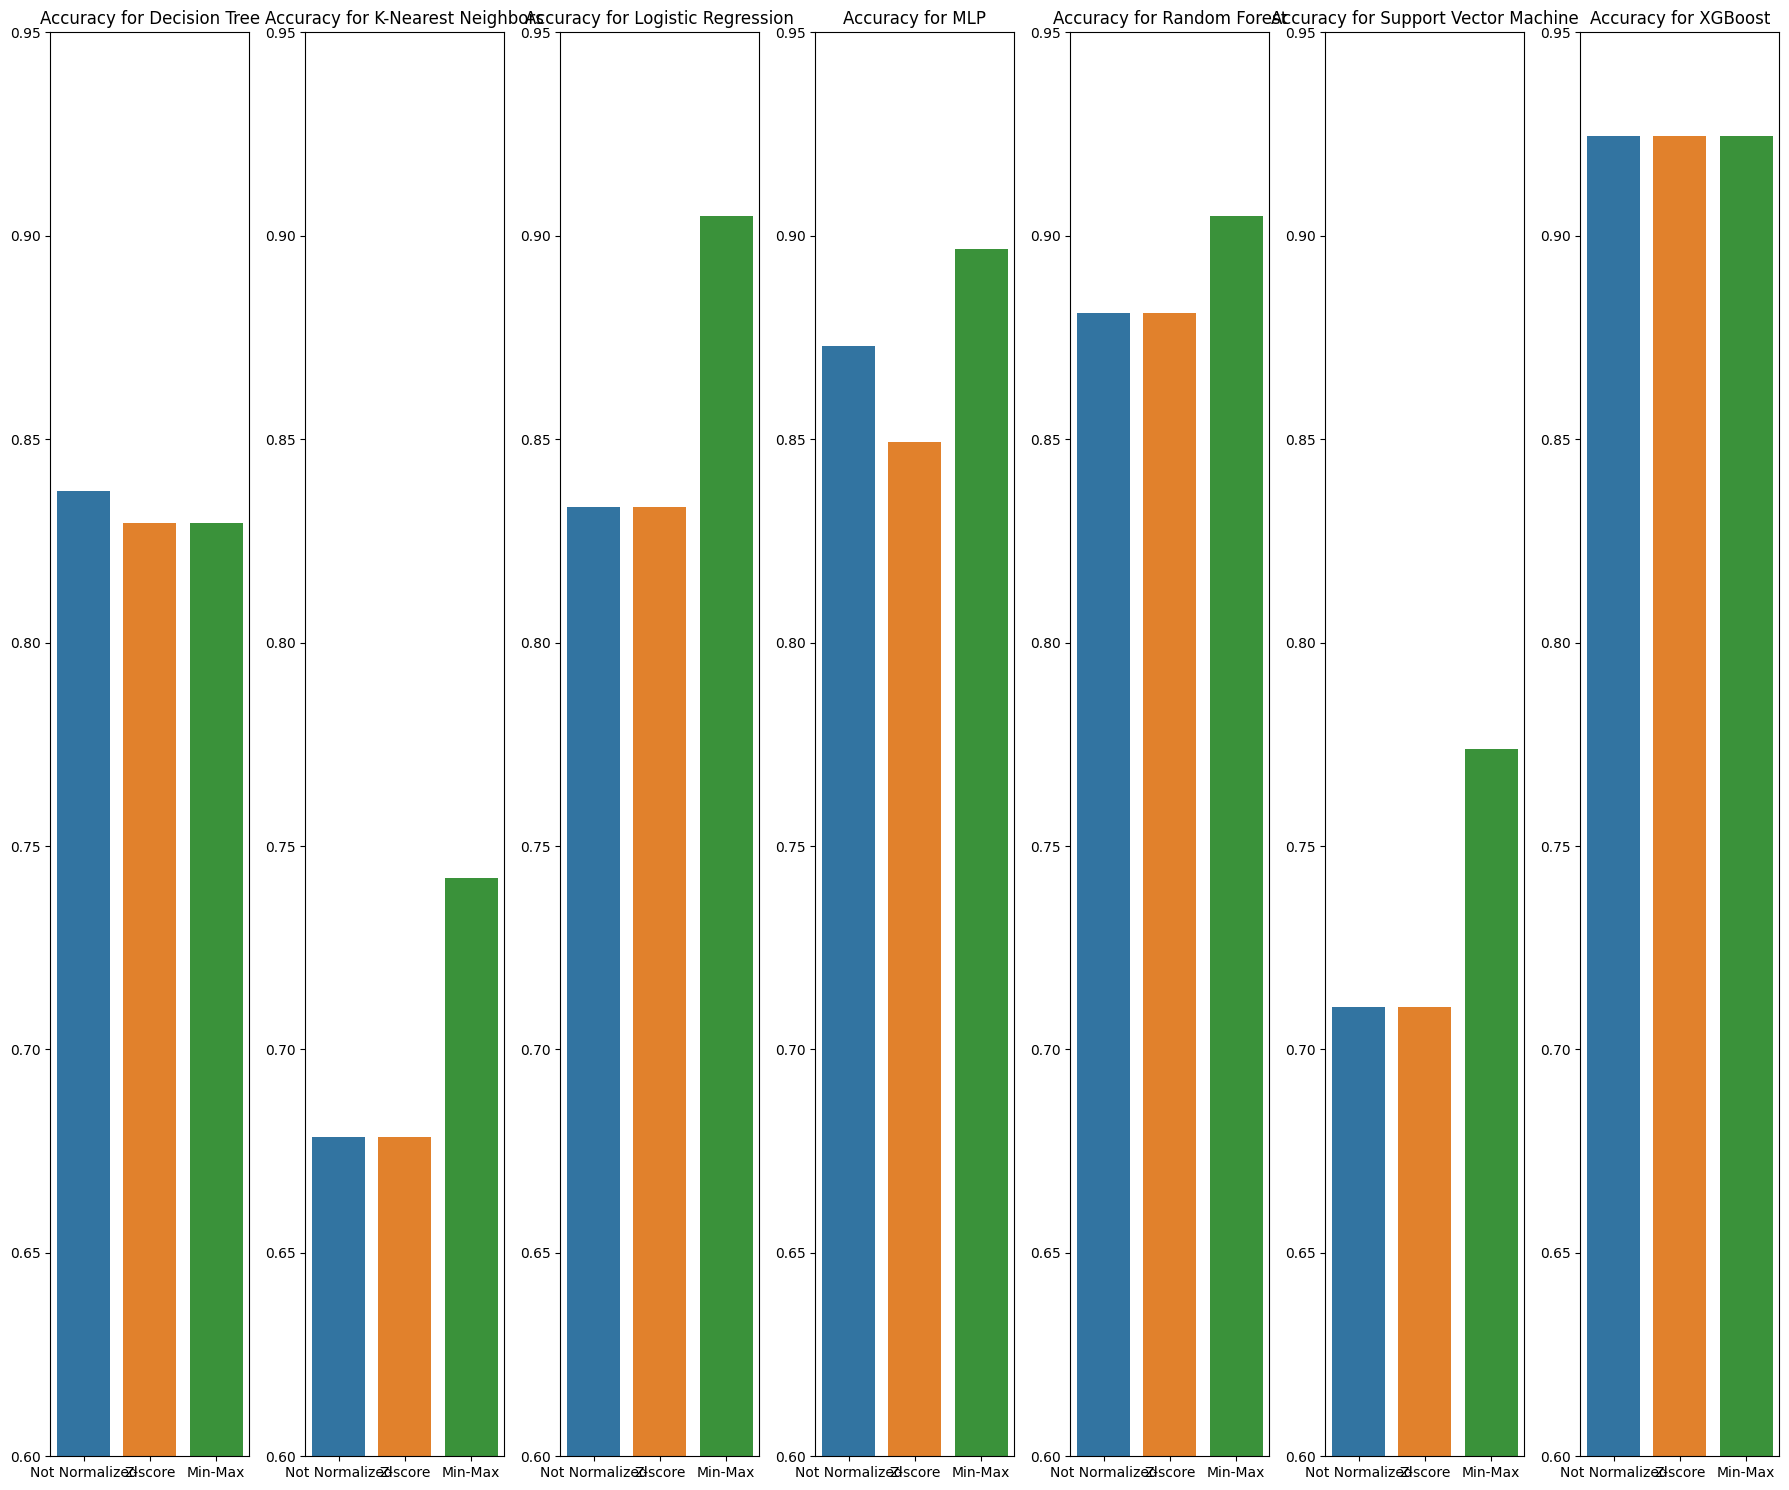

In [68]:
plt.figure(figsize=(18, 15))

for i, (model_name, model) in enumerate(classifiers.items()):
    accuracies = []  # to store accuracies for each normalization method
    for normalization_method in normalization_methods:
        if normalization_method == 'Z-Score':
            x_train_normalized = x_train_std
            x_test_normalized = x_test_std
        elif normalization_method == 'Min-Max':
            x_train_normalized = (x_train - x_train.min()) / (x_train.max() - x_train.min())
            x_test_normalized = (x_test - x_train.min()) / (x_train.max() - x_train.min())
        else:
            x_train_normalized, x_test_normalized = x_train, x_test

        # Replace infinite values with NaN
        x_train_normalized[~np.isfinite(x_train_normalized)] = np.nan
        x_test_normalized[~np.isfinite(x_test_normalized)] = np.nan

        # Impute missing values
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=UserWarning)
            imputer = SimpleImputer(strategy='median')  # Change strategy to median
            x_train_normalized = imputer.fit_transform(x_train_normalized)
            x_test_normalized = imputer.transform(x_test_normalized)

        model.fit(x_train_normalized, y_train_encoded)
        y_pred = model.predict(x_test_normalized)
        accuracy = accuracy_score(y_test_encoded, y_pred)
        accuracies.append(accuracy)
        accuracies_dict[model_name].append((normalization_method, accuracy))


    # Plotting for each classifier
    plt.subplot(1, len(classifiers), i + 1)
    sns.barplot(x=normalization_methods, y=accuracies)
    plt.title(f'Accuracy for {model_name}')
    plt.ylim(0.60, 0.95)

plt.tight_layout()
plt.show()


In [69]:
from sklearn.model_selection import GridSearchCV

In [84]:
decision_tree_classifier = DecisionTreeClassifier()

In [71]:
# Hyperparameter tuning for Decision Tree using GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search_dt.fit(x_train_std, y_train_encoded)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [86]:
# Extract best estimator from the grid search
best_decision_tree_model = grid_search_dt.best_estimator_

In [120]:
# Dataframe to store optimized hyperparameters
hyperparameter_table = pd.DataFrame(columns=['Normalization Method', 'Criterion', 'Max Depth', 'Min Samples Split', 'Min Samples Leaf', 'Random State'])

Default Accuracy (Not Normalized): 0.8373015873015873
Tuned Accuracy (Not Normalized): 0.7738095238095238
Default Accuracy (Z-score): 0.8293650793650794
Tuned Accuracy (Z-score): 0.7738095238095238
Default Accuracy (Min-Max): 0.8293650793650794
Tuned Accuracy (Min-Max): 0.7579365079365079


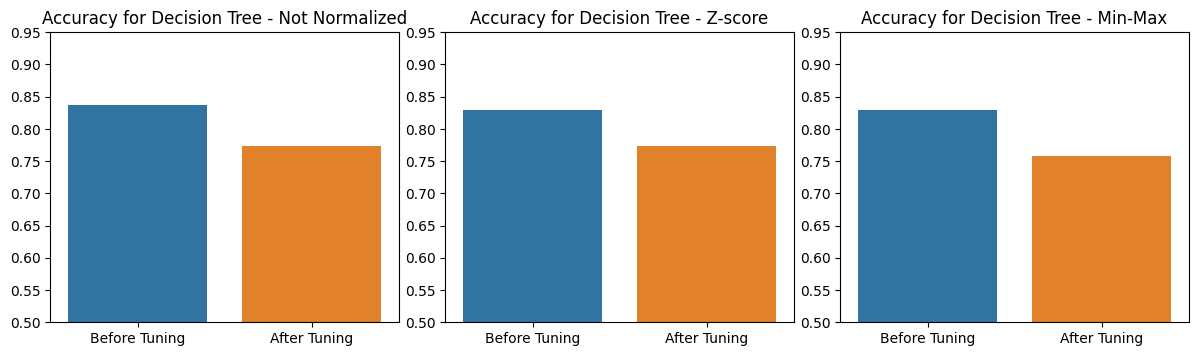

In [121]:
# Plotting accuracy before and after hyperparameter tuning
plt.figure(figsize=(12, 10))


for i, normalization_method in enumerate(normalization_methods):
    accuracies = []

    if normalization_method == 'Z-Score':
        x_train_normalized = x_train_std
        x_test_normalized = x_test_std
    elif normalization_method == 'Min-Max':
        x_train_normalized = (x_train - x_train.min()) / (x_train.max() - x_train.min())
        x_test_normalized = (x_test - x_train.min()) / (x_train.max() - x_train.min())
    else:
        x_train_normalized, x_test_normalized = x_train, x_test

    x_train_normalized[~np.isfinite(x_train_normalized)] = np.nan
    x_test_normalized[~np.isfinite(x_test_normalized)] = np.nan

    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=UserWarning)
        imputer = SimpleImputer(strategy='median')
        x_train_normalized = imputer.fit_transform(x_train_normalized)
        x_test_normalized = imputer.transform(x_test_normalized)

    # Before hyperparameter tuning
    decision_tree_classifier.fit(x_train_normalized, y_train_encoded)
    y_pred = decision_tree_classifier.predict(x_test_normalized)
    accuracy_before = accuracy_score(y_test_encoded, y_pred)
    accuracies.append(accuracy_before)
    print(f"Default Accuracy ({normalization_method}): {accuracy_before}") 

    # After hyperparameter tuning
    best_decision_tree_model.fit(x_train_normalized, y_train_encoded)
    y_pred_best = best_decision_tree_model.predict(x_test_normalized)
    accuracy_after = accuracy_score(y_test_encoded, y_pred_best)
    accuracies.append(accuracy_after)
    print(f"Tuned Accuracy ({normalization_method}): {accuracy_after}") 

    # Extract optimized hyperparameters
    best_params = best_decision_tree_model.get_params()
    hyperparameter_table = pd.concat([hyperparameter_table, pd.DataFrame({
    'Normalization Method': [normalization_method],
    'Criterion': [best_params['criterion']],
    'Max Depth': [best_params['max_depth']],
    'Min Samples Split': [best_params['min_samples_split']],
    'Min Samples Leaf': [best_params['min_samples_leaf']],
    'Random State': [best_params['random_state']]
    })], ignore_index=True)

    # Plotting
    plt.subplot(3, 3, i + 1)
    sns.barplot(x=['Before Tuning', 'After Tuning'], y=accuracies)
    plt.title(f'Accuracy for Decision Tree - {normalization_method}')
    plt.ylim(0.50, 0.95)

plt.tight_layout()
plt.show()

In [122]:
# Display the optimized hyperparameter table
print("\nOptimized Hyperparameters:")
print(hyperparameter_table)


Optimized Hyperparameters:
  Normalization Method Criterion Max Depth Min Samples Split Min Samples Leaf  \
0       Not Normalized   entropy      None                 2                1   
1              Z-score   entropy      None                 2                1   
2              Min-Max   entropy      None                 2                1   

  Random State  
0            0  
1            0  
2            0  
